In [ ]:
! pip install cdlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 228 kB 5.1 MB/s 
     |████████████████████████████████| 14.3 MB 60.5 MB/s 
     |████████████████████████████████| 2.6 MB 45.9 MB/s 
     |████████████████████████████████| 3.2 MB 37.7 MB/s 
     |████████████████████████████████| 175 kB 58.4 MB/s 
     |████████████████████████████████| 2.2 MB 34.4 MB/s 
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395122 sha256=fec1ff906ee0352febdcd4d6ad5c8848595e01c12da3f6635243974bcf6a9066
  Stored in directory: /root/.cache/pip/wheels/ea/87/6b/1e0568b5ba9dc6518a25338bae90bd8392f35206bb90bb10f1
  Created wheel for python-igraph: filename=python_igraph-0.10.2-py3-none-any.whl size=9073 sha256=8f3f1f2c0309b92e9406980f6e7b0f822055fd9ebefe3813f051c202f01470f4
  Stored in directory: /root/.cache/pip/wheels/74/1d/33/83ec153aa37c92957b2edb888f4f42fdea9b7ac89f4b919391
Successf

In [ ]:
! pip install cdlib[C]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 9.8 MB 4.2 MB/s 
     |████████████████████████████████| 64 kB 2.7 MB/s 
     |████████████████████████████████| 136 kB 42.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 262 kB 49.4 MB/s 
     |████████████████████████████████| 1.3 MB 49.2 MB/s 
     |████████████████████████████████| 664 kB 74.5 MB/s 
     |████████████████████████████████| 1.8 MB 44.8 MB/s 
     |████████████████████████████████| 24.1 MB 1.6 MB/s 
     |████████████████████████████████| 216 kB 75.8 MB/s 
  Created wheel for infomap: filename=infomap-2.6.1-cp37-cp37m-linux_x86_64.whl size=5618543 sha256=212c46a7ae56ba2a58c676a2370e12d403500739d05161af846f676b55f3c619
  Stored in directory: /root/.cache/pip/wheels/62/e6/7d/edf1b6673327dc016fb9738995080314500

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

import os 
from cdlib import algorithms, evaluation, viz
import infomap

Note: to be able to use all crisp methods, you need to install some additional packages:  {'graph_tool'}


Note: to be able to use all overlapping methods, you need to install some additional packages:  {'ASLPAw'}


## 1. Load Data

In [ ]:
#% sym unweighted
#% 925872 334863 334863
amazon = pd.read_csv("out.com-amazon.csv", delimiter = " ", 
                     names=['node1', 'node2'])

In [ ]:
amazon.head(5)

,node1,node2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


## 2. Build a network

- node: product
- edge: co-purchase (two product bought together)
- weight: frequency

### 0) Nodes

In [ ]:
unique1 = amazon.node1.unique()
unique2 = amazon.node2.unique()
nodes = list(np.unique(np.concatenate((unique1,unique2), axis=0)))

In [ ]:
# number of node
len(nodes)

334863

### 1) Edges

In [ ]:
edges = amazon.drop_duplicates()
edges.head()

,node1,node2
0,1,2
1,1,3
2,1,4
3,1,5
4,1,6


In [ ]:
# number of edge 
edges.shape[0]

925872

### 2) Weights

In [ ]:
weights = amazon.groupby(['node1', 'node2']).size().reset_index()
weights = weights.rename(columns={0: 'weight'})
weights.head(5)


,node1,node2,weight
0,1,2,1
1,1,3,1
2,1,4,1
3,1,5,1
4,1,6,1


In [ ]:
weights['new_weight'] = weights['weight']/weights.groupby('node1')['weight'].transform(sum)
weights.head()

,node1,node2,weight,new_weight
0,1,2,1,0.125
1,1,3,1,0.125
2,1,4,1,0.125
3,1,5,1,0.125
4,1,6,1,0.125


### 3) Merge weight with edges

In [ ]:
edges_weighted = pd.merge(edges, weights[["node1", "node2", "new_weight"]], 
                          how="inner", on=["node1", "node2"])
edges_weighted.columns = ['target', 'source', 'weight']
edges_weighted.head(10)

,target,source,weight
0,1,2,0.125000
1,1,3,0.125000
2,1,4,0.125000
3,1,5,0.125000
4,1,6,0.125000
5,1,7,0.125000
6,1,8,0.125000
7,1,9,0.125000
8,2,4,0.166667
9,2,6,0.166667


### 4) Quick visualization

In [ ]:
G = nx.from_pandas_edgelist(edges_weighted, source='source', target='target', create_using=nx.DiGraph(), edge_attr="weight").to_undirected()

In [ ]:
type(G) # undirected graph

networkx.classes.graph.Graph

In [ ]:
nodes_interest = list(edges_weighted[edges_weighted.target == 1].source.head(20)) + [1]

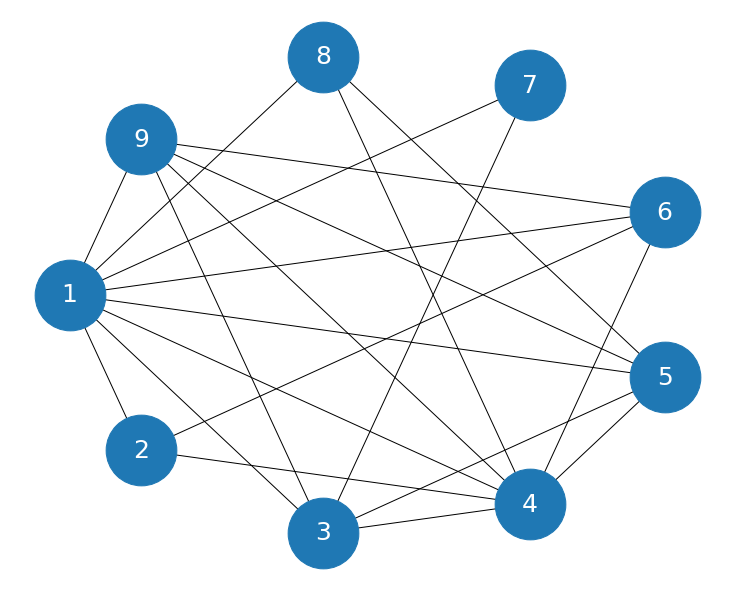

In [ ]:
plt.figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=nodes_interest), with_labels=True, node_size=5000, font_size=25, font_color='white')

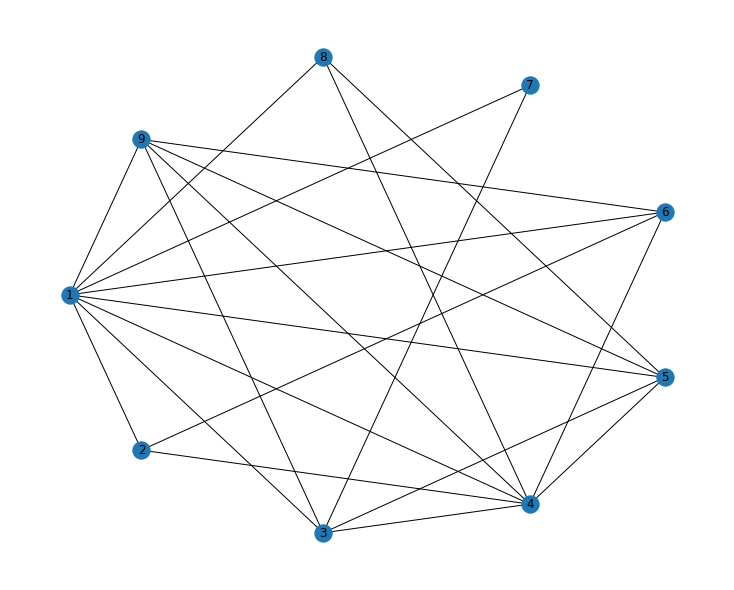

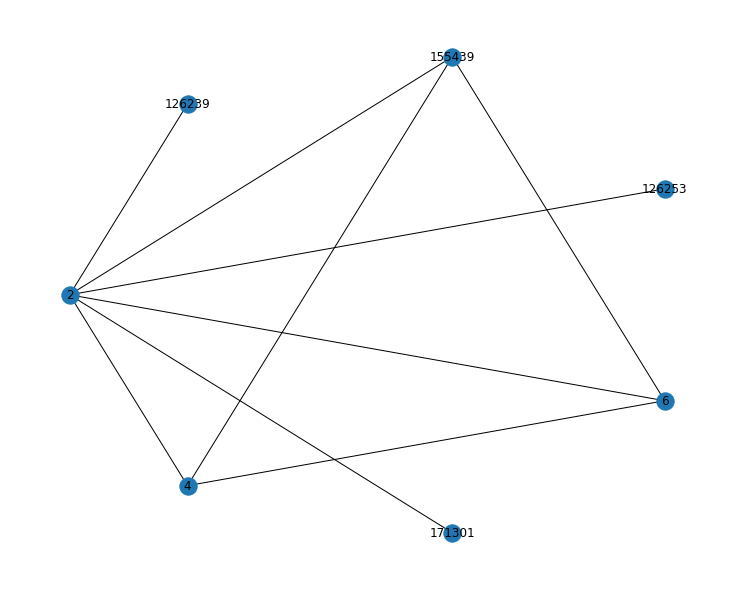

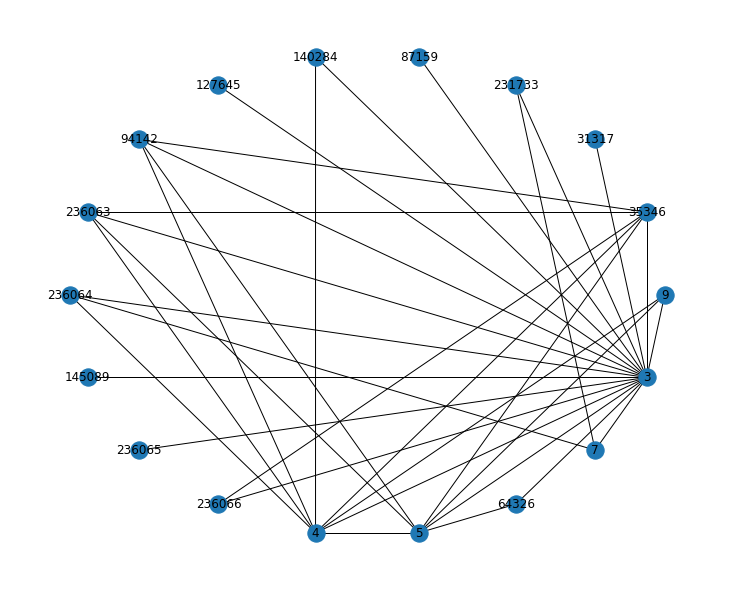

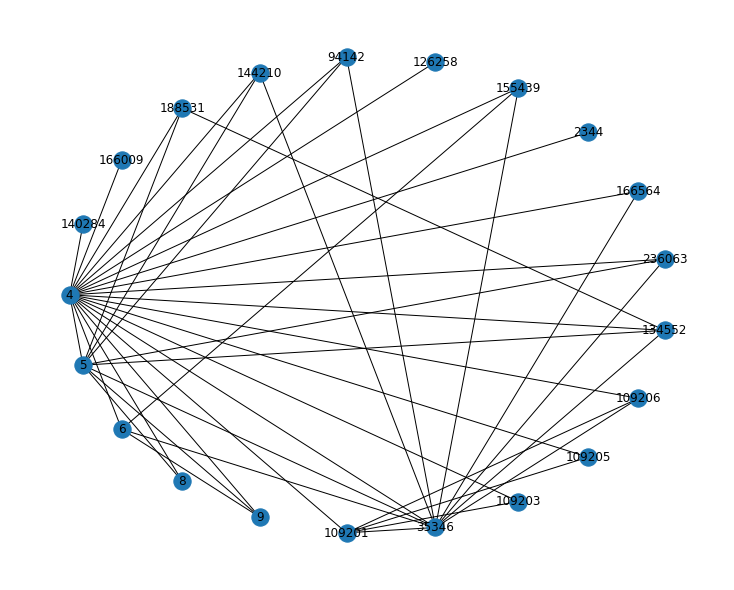

In [ ]:
for i in range(1, 5):
  nodes_interest = list(edges_weighted[edges_weighted.target == i].source.head(20)) + [i]
  plt.figure(figsize=(10, 8))
  nx.draw_shell(G.subgraph(nodes=nodes_interest), with_labels=True)

## 3.Basic Graph metrics

### 1) number of nodes

In [ ]:
len(G.nodes)

334863

### 2) number of edges

In [ ]:
len(G.edges)

925872

### 3) degree

In [ ]:
G.degree(1)

8

In [ ]:
list(G.neighbors(n=1))

[2, 3, 4, 5, 6, 7, 8, 9]

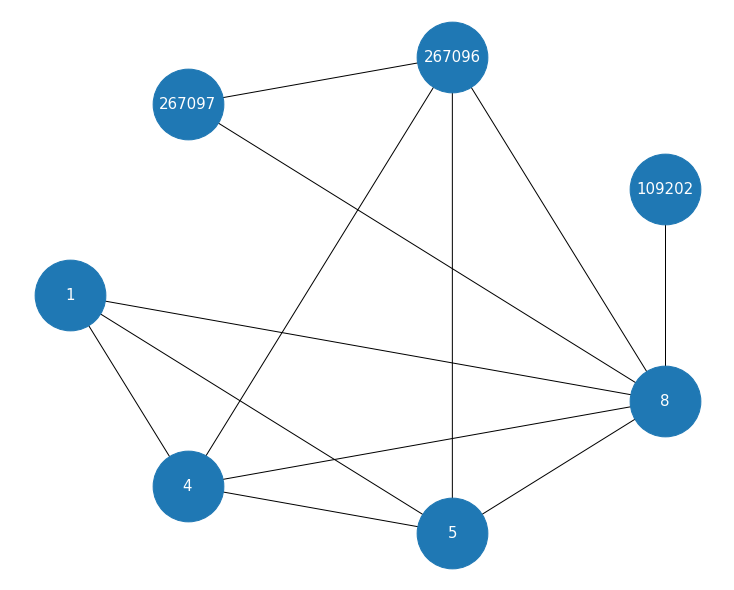

In [ ]:
plt.figure(figsize=(10, 8))
nx.draw_shell(G.subgraph(nodes=list(G.neighbors(n=8)) + [8]), with_labels=True,node_size=5000, font_size=15, font_color='white')

### 4) Path with length <=2

In [ ]:
list(nx.simple_paths.all_simple_paths(G, source=1, target=8, cutoff=2))

[[1, 4, 8], [1, 5, 8], [1, 8]]

### 5) Shortest Path

In [ ]:
list(nx.shortest_path(G, source=8, target=1))

[8, 1]

In [ ]:
nx.shortest_path_length(G, source=8, target=1)

1

## 4. Node Importance (Influencers)

### 1) Degree Centrality
has many co-purchases products is important

In [ ]:
result = nx.degree_centrality(G)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [ ]:
sorted_d[0]

(953, 0.0016394813385812662)

In [ ]:
sorted_d[1]

(5034, 0.0009675627571955014)

In [ ]:
for i in range(10):
  print(sorted_d[i])

(953, 0.0016394813385812662)
(5034, 0.0009675627571955014)
(6735, 0.0007674803351828515)
(1792, 0.0006868501054165596)
(31337, 0.0006808774958042417)
(4817, 0.0006540007525488111)
(8545, 0.0006480281429364932)
(33625, 0.0006330966189056985)
(8833, 0.0006121924852625858)
(3613, 0.0005883020468133141)


### 2) Betweenness Centrality
lie on the shortest path between other node

In [ ]:
G_subgraph = G.subgraph(nodes=nodes[0:2000])

In [ ]:
result = nx.betweenness_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [ ]:
sorted_d[0]

(1325, 0.0010752957392944054)

In [ ]:
for i in range(10):
  print(sorted_d[i])

(1325, 0.0010752957392944054)
(1293, 0.0003391084931855318)
(1049, 0.0002571355747944042)
(479, 0.00024386567658203477)
(1654, 0.00013204800598497449)
(1791, 0.0001269403470504021)
(384, 0.0001229343400428943)
(377, 0.00011951254239064813)
(1255, 0.00010193618664520784)
(1074, 9.614416818018619e-05)


### 3) Closeness Centrality
close to most node in the network

In [ ]:
result = nx.closeness_centrality(G_subgraph)
sorted_d = sorted(result.items(), key=lambda kv: kv[1],reverse=True)

In [ ]:
for i in range(10):
  print(sorted_d[i])

(1325, 0.03601800900450225)
(1388, 0.02294952786127577)
(1337, 0.0196461867297285)
(1378, 0.0196461867297285)
(1371, 0.019352960062120613)
(1372, 0.019352960062120613)
(1396, 0.019352960062120613)
(1391, 0.0190683577082659)
(1349, 0.018929172615504832)
(1354, 0.018929172615504832)


## 5. Community Detection

### 1) Girvan & Newman Clustering

In [ ]:
#G = nx.karate_club_graph()
pos = nx.layout.fruchterman_reingold_layout(G_subgraph)

In [ ]:
coms_edge_betweenness = algorithms.girvan_newman(G_subgraph, level=4)

In [ ]:
print("Community List: " + str(coms_edge_betweenness.communities))
print("Conductance: " + str(coms_edge_betweenness.conductance()))
print("Expansion: " + str(coms_edge_betweenness.expansion()))
print("Internal Density: " + str(coms_edge_betweenness.internal_edge_density()))

Community List: [[1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397], [512, 513, 479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511], [140, 1293, 142, 143, 1295, 1296, 1297, 1299, 1300, 1294, 1302, 1298, 1301, 1303, 1304, 1305, 1307, 1309, 1308, 1311, 1310, 1312, 1313, 1314, 1316, 1315, 1318, 1319, 1317, 1320, 1321, 1322, 1324, 1323], [1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 

In [ ]:
# the number of communities detected in total
len(coms_edge_betweenness.communities)

276

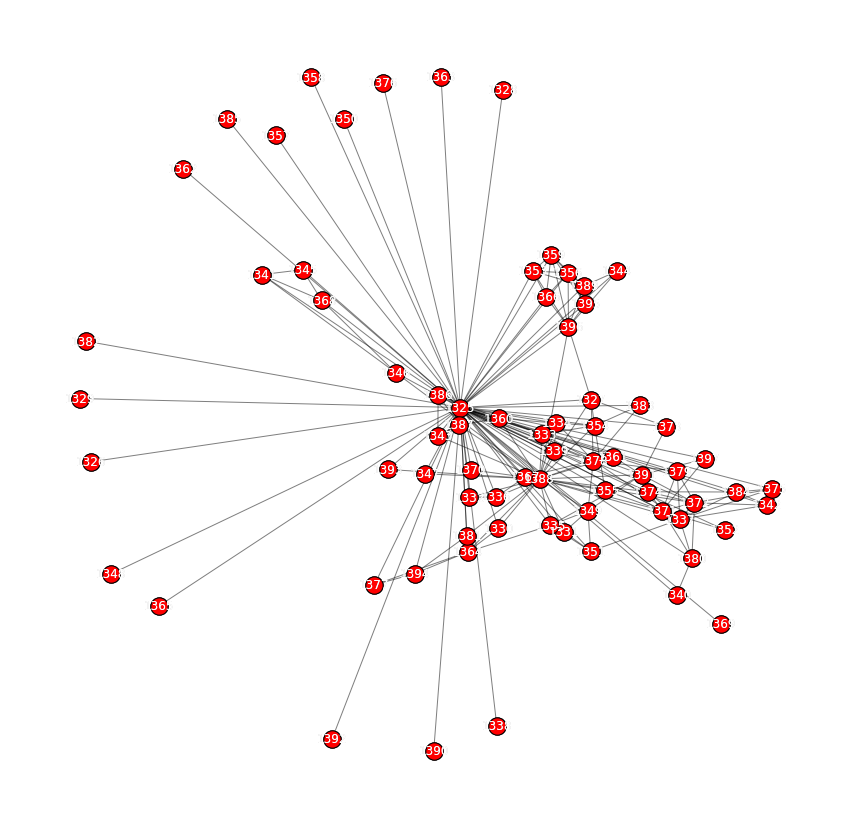

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_edge_betweenness, pos, plot_labels=True, node_size=300,figsize=(15,15), top_k=1)

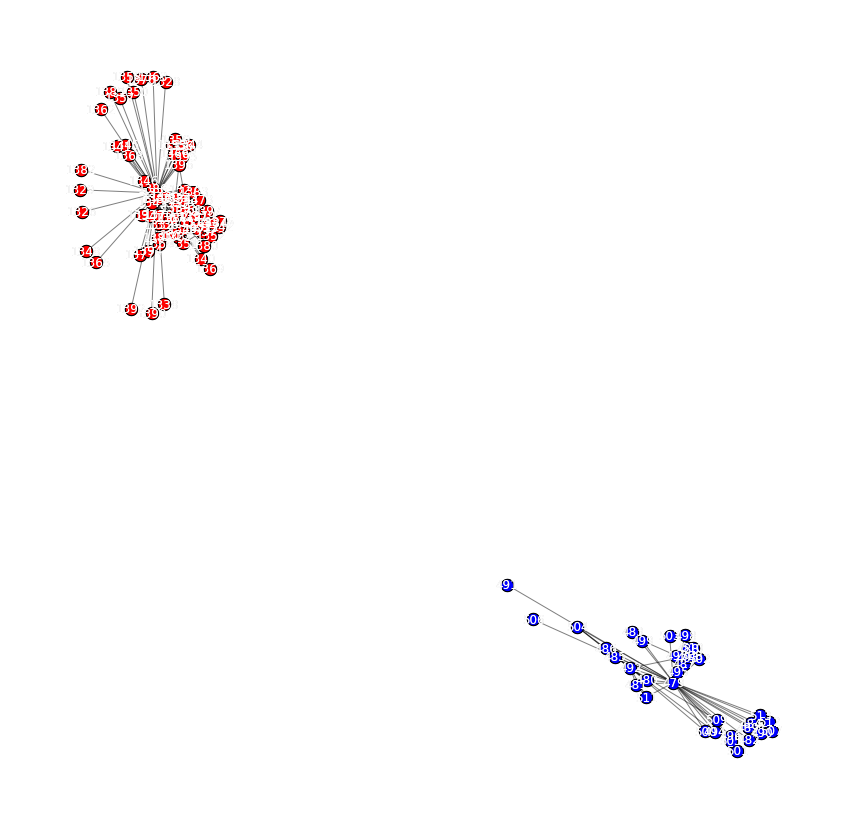

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_edge_betweenness, pos, plot_labels=True, node_size=150,figsize=(15,15), top_k=2)

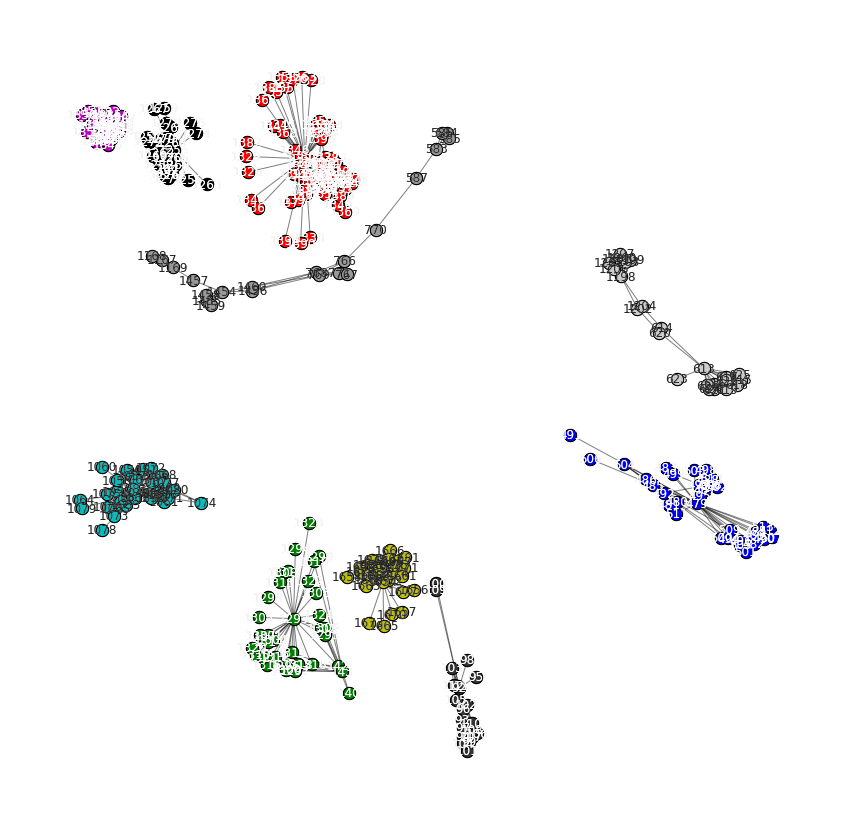

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_edge_betweenness, pos, plot_labels=True, node_size=150,figsize=(15,15), top_k=10)

### 2) Louvain Modularity

In [ ]:
coms_louvain = algorithms.louvain(G_subgraph, resolution=1)

In [ ]:
print("Community List: " + str(coms_louvain.communities))
print("Conductance: " + str(coms_louvain.conductance()))
print("Expansion: " + str(coms_louvain.expansion()))
print("Internal Density: " + str(coms_louvain.internal_edge_density()))

Community List: [[1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1354, 1355, 1357, 1358, 1360, 1361, 1362, 1363, 1364, 1365, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1390, 1391, 1392, 1393, 1394, 1397], [136, 137, 138, 139, 140, 141, 142, 143, 144, 694, 695, 696, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324], [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503, 504, 505, 506, 507, 508, 509, 510, 511, 512, 513], [351, 352, 353, 354, 355, 356, 357, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 833, 834, 835, 925, 926, 927, 928, 929, 930, 931, 1791, 1792, 1793, 1

In [ ]:
# the communities detected example
coms_louvain.communities[234]

[593, 594, 595]

In [ ]:
# the number of communities detected in total
len(coms_louvain.communities)

275

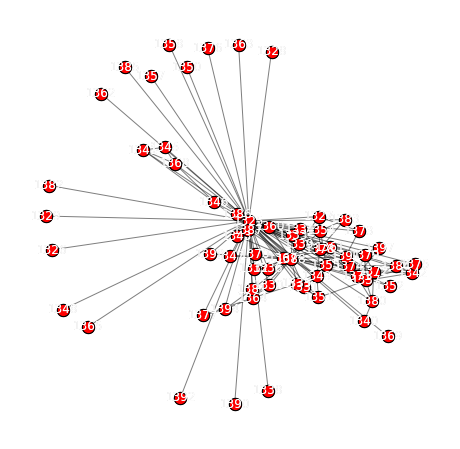

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_louvain, pos, plot_labels=True, node_size=150, top_k=1)

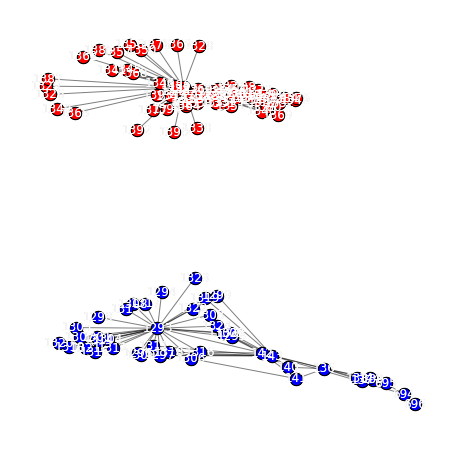

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_louvain, pos, plot_labels=True, node_size=150, top_k=2)

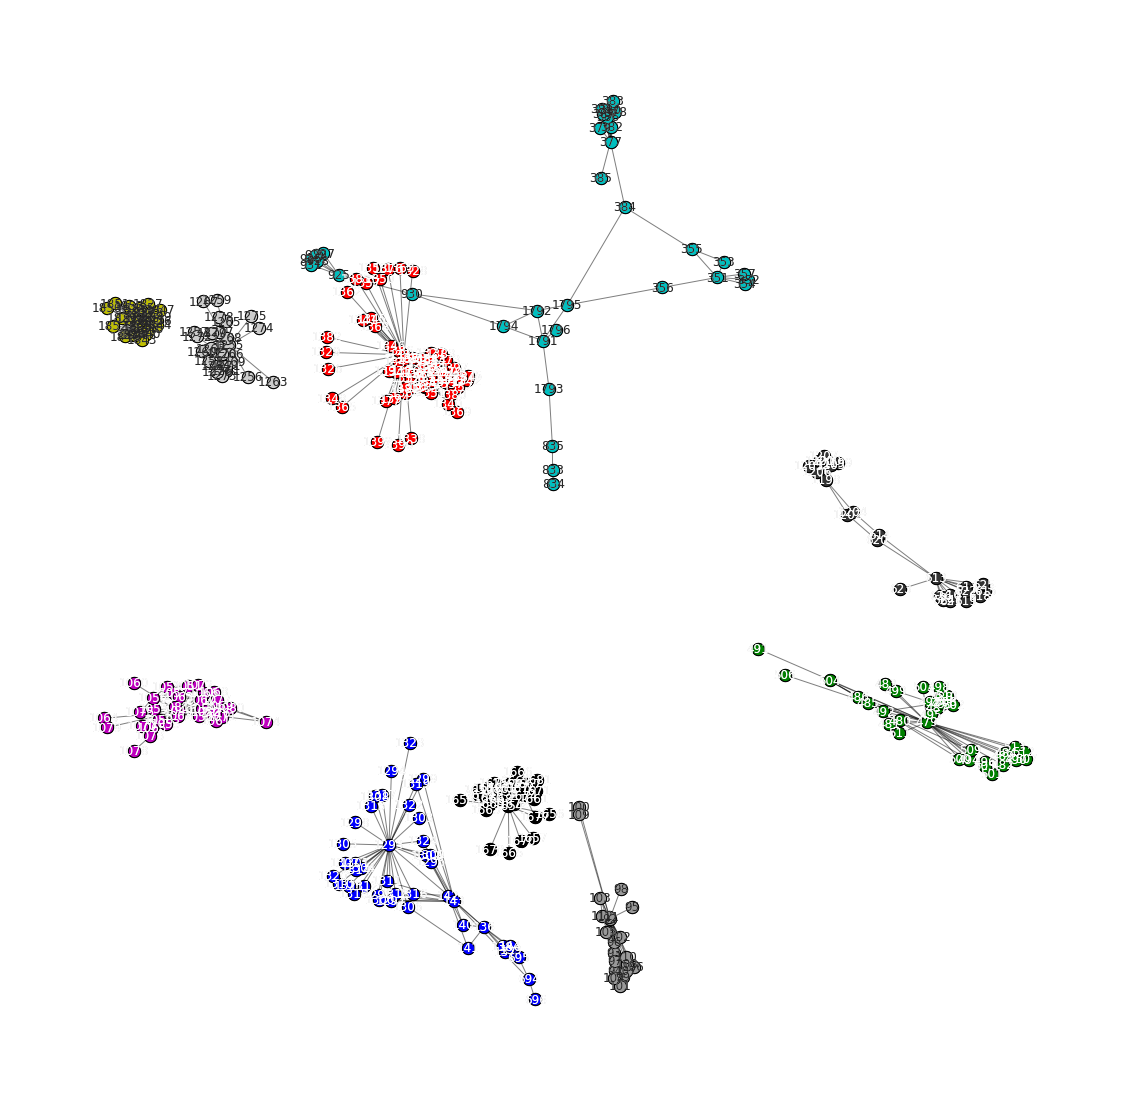

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_louvain, pos, plot_labels=True, node_size=150, top_k=10, figsize=(20,20))

### 3) Infomap

In [ ]:
coms_infomap = algorithms.infomap(G_subgraph)

In [ ]:
print("Community List: " + str(coms_infomap.communities))
print("Conductance: " + str(coms_infomap.conductance()))
print("Expansion: " + str(coms_infomap.expansion()))
print("Internal Density: " + str(coms_infomap.internal_edge_density()))

Community List: [[1325, 1326, 1327, 1328, 1329, 1330, 1331, 1332, 1333, 1334, 1335, 1336, 1337, 1338, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347, 1348, 1349, 1350, 1351, 1352, 1353, 1354, 1355, 1356, 1357, 1358, 1359, 1360, 1361, 1362, 1363, 1364, 1365, 1366, 1367, 1368, 1369, 1370, 1371, 1372, 1373, 1374, 1375, 1376, 1377, 1378, 1379, 1380, 1381, 1382, 1383, 1384, 1385, 1386, 1387, 1388, 1389, 1390, 1391, 1392, 1393, 1394, 1395, 1396, 1397], [136, 137, 138, 139, 140, 141, 142, 143, 144, 694, 695, 696, 1293, 1294, 1295, 1296, 1297, 1298, 1299, 1300, 1301, 1302, 1303, 1304, 1305, 1306, 1307, 1308, 1309, 1310, 1311, 1312, 1313, 1314, 1315, 1316, 1317, 1318, 1319, 1320, 1321, 1322, 1323, 1324], [731, 732, 733, 734, 735, 1049, 1050, 1051, 1052, 1053, 1054, 1055, 1056, 1057, 1058, 1059, 1060, 1061, 1062, 1063, 1064, 1065, 1066, 1067, 1068, 1069, 1070, 1071, 1072, 1073, 1074, 1075, 1076, 1077, 1078, 1079, 1080, 1081, 1222], [479, 480, 481, 482, 483, 484, 485, 486, 487, 488, 489, 49

In [ ]:
# the number of communities detected in total
len(coms_infomap.communities)

272

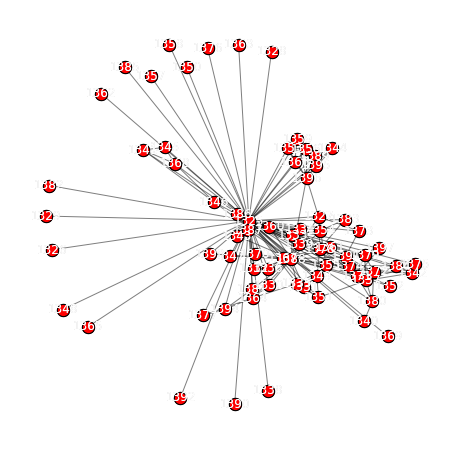

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_infomap, pos, plot_labels=True, node_size=150, top_k=1)

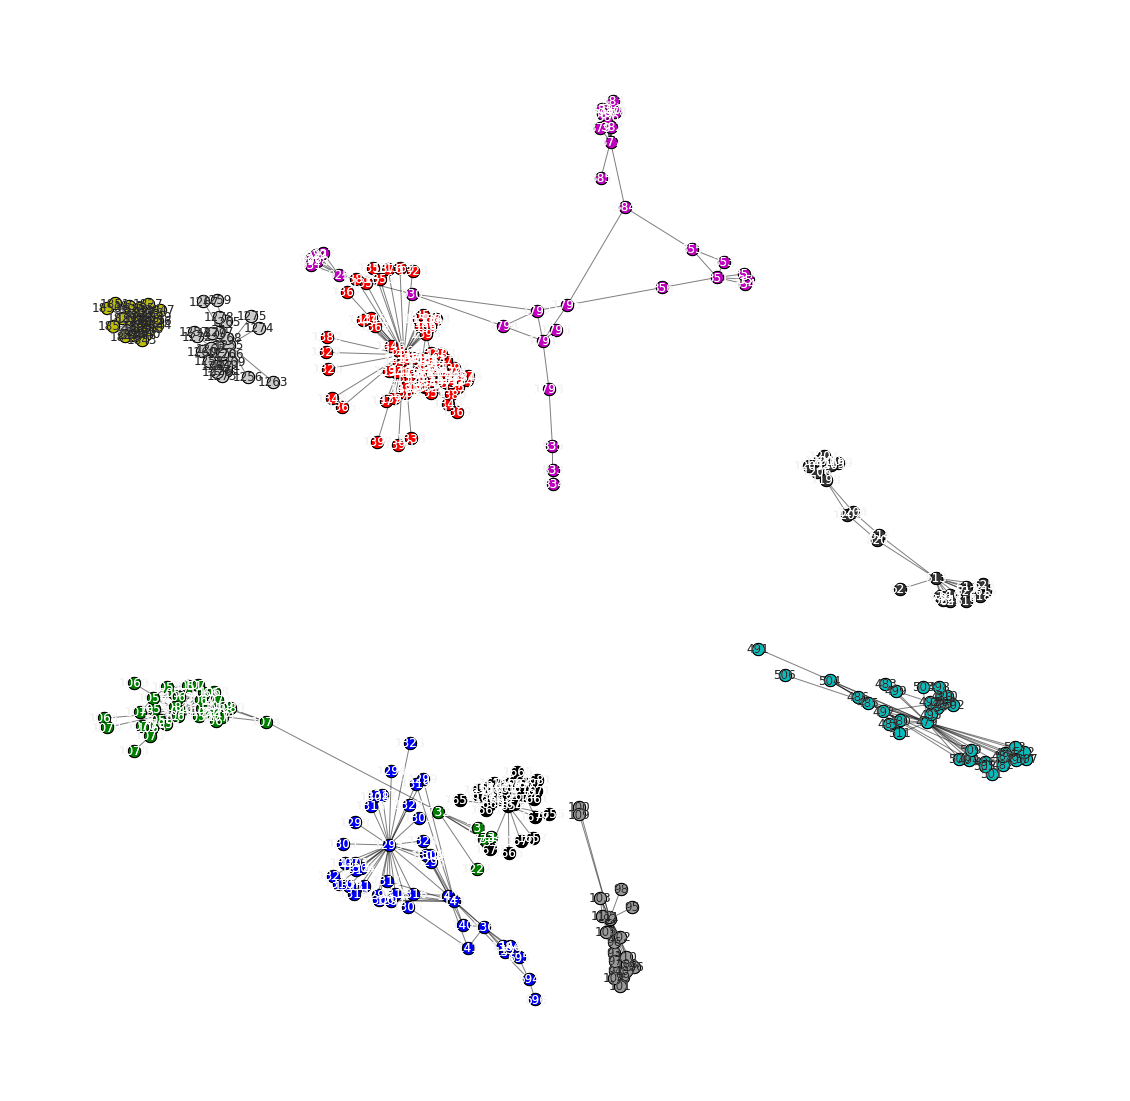

In [ ]:
viz.plot_network_clusters(G_subgraph, coms_infomap, pos, plot_labels=True, node_size=150, top_k=10, figsize=(20,20))